In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("Student_Performance.csv")

In [ ]:
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
data= data[["Hours Studied", "Previous Scores", "Sleep Hours","Performance Index"]]

In [ ]:
data


,Hours Studied,Previous Scores,Sleep Hours,Performance Index
0,7,99,9,91.0
1,4,82,4,65.0
2,8,51,7,45.0
3,5,52,5,36.0
4,7,75,8,66.0
...,...,...,...,...
9995,1,49,4,23.0
9996,7,64,8,58.0
9997,6,83,8,74.0
9998,9,97,7,95.0


In [ ]:
training, testing  = train_test_split(data,
                                   random_state=41,
                                   test_size=0.9)

In [ ]:
testing


,Hours Studied,Previous Scores,Sleep Hours,Performance Index
9745,7,93,6,84.0
4492,5,79,4,67.0
3439,8,78,8,72.0
6077,2,41,4,17.0
5372,5,83,8,71.0
...,...,...,...,...
3781,3,75,9,60.0
4418,4,83,4,62.0
453,1,46,4,22.0
389,8,94,8,88.0


In [ ]:
testing.corr()["Performance Index"]

Hours Studied        0.374564
Previous Scores      0.915133
Sleep Hours          0.049962
Performance Index    1.000000
Name: Performance Index, dtype: float64

In [ ]:
training.corr()["Performance Index"]

Hours Studied        0.365764
Previous Scores      0.915764
Sleep Hours          0.031538
Performance Index    1.000000
Name: Performance Index, dtype: float64

In [ ]:
import seaborn as sns

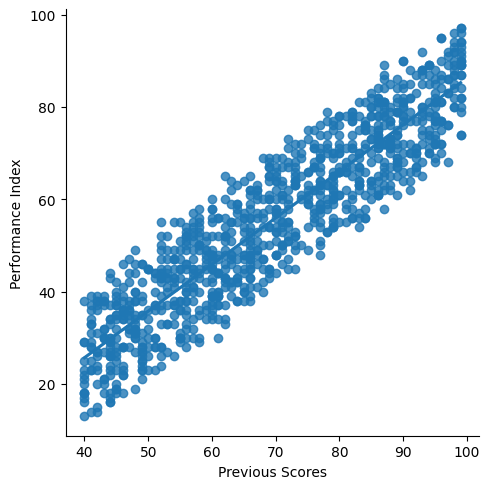

In [ ]:
sns.lmplot(x="Previous Scores", y="Performance Index", data =training, fit_reg=True, ci=None)

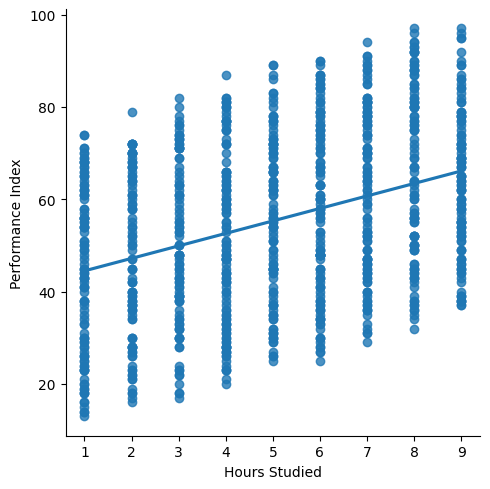

In [ ]:
sns.lmplot(x="Hours Studied", y="Performance Index", data =training, fit_reg=True, ci=None)

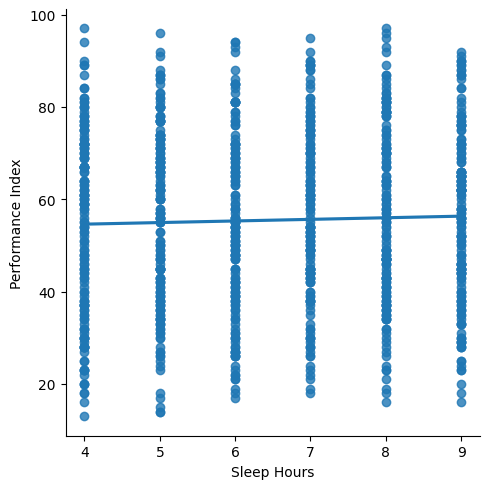

In [ ]:
sns.lmplot(x="Sleep Hours", y="Performance Index", data =training, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

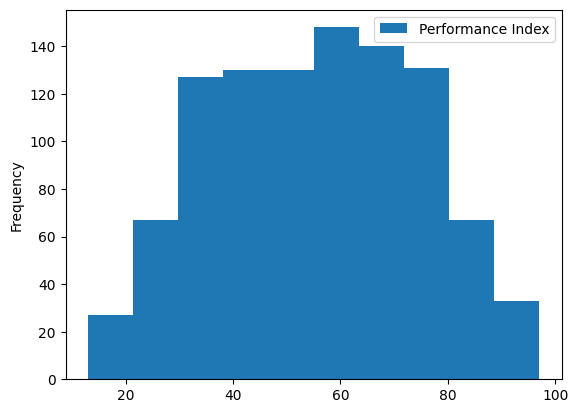

In [ ]:
training.plot.hist(y="Performance Index")

In [ ]:
training.shape

(1000, 4)

In [ ]:
testing.shape


(9000, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
predictors=["Hours Studied", "Previous Scores", "Sleep Hours"]
target="Performance Index"

In [ ]:
reg.fit(training[predictors], training["Performance Index"])

LinearRegression()

In [ ]:
predictions=reg.predict(testing[predictors])

In [ ]:
predictions


array([84.60384179, 63.74019478, 73.11173107, ..., 18.87467274,
       89.41197374, 43.77296992])

In [ ]:
testing["predictions"]=predictions

In [ ]:
testing

,Hours Studied,Previous Scores,Sleep Hours,Performance Index,predictions
9745,7,93,6,84.0,84.603842
4492,5,79,4,67.0,63.740195
3439,8,78,8,72.0,73.111731
6077,2,41,4,17.0,16.592415
5372,5,83,8,71.0,69.770853
...,...,...,...,...,...
3781,3,75,9,60.0,56.486496
4418,4,83,4,62.0,65.003688
453,1,46,4,22.0,18.874673
389,8,94,8,88.0,89.411974


In [ ]:
testing.loc[testing["predictions"]<0, "predictions"]=0

In [ ]:
testing.loc[testing["predictions"]>100, "predictions"]=100

In [ ]:
testing["predictions"]=testing['predictions'].round()

In [ ]:
from sklearn.metrics import mean_absolute_error
err = mean_absolute_error(testing["Performance Index"],testing["predictions"])

In [ ]:
err


1.6857777777777778

In [ ]:
testing.describe()["Performance Index"]

count    9000.000000
mean       55.196000
std        19.247605
min        10.000000
25%        40.000000
50%        55.000000
75%        71.000000
max       100.000000
Name: Performance Index, dtype: float64

In [ ]:
errorlist=(testing["Performance Index"]-testing["predictions"]).abs()

In [ ]:
errorlist

9745    1.0
4492    3.0
3439    1.0
6077    0.0
5372    1.0
       ... 
3781    4.0
4418    3.0
453     3.0
389     1.0
1857    4.0
Length: 9000, dtype: float64

In [ ]:
error_by_team = errorlist.groupby(testing["Hours Studied"]).mean()

In [ ]:
performance_by_hour=testing["Performance Index"].groupby(testing["Hours Studied"]).mean()

In [ ]:
errorratio=error_by_team/performance_by_hour

In [ ]:
errorratio


Hours Studied
1    0.038684
2    0.037618
3    0.033383
4    0.032029
5    0.028107
6    0.029182
7    0.028195
8    0.026131
9    0.026248
dtype: float64

In [ ]:
errorratio=(1-errorratio)*100

In [ ]:
errorratio


Hours Studied
1    96.131574
2    96.238210
3    96.661740
4    96.797132
5    97.189316
6    97.081771
7    97.180488
8    97.386920
9    97.375157
dtype: float64

<Axes: ylabel='Frequency'>

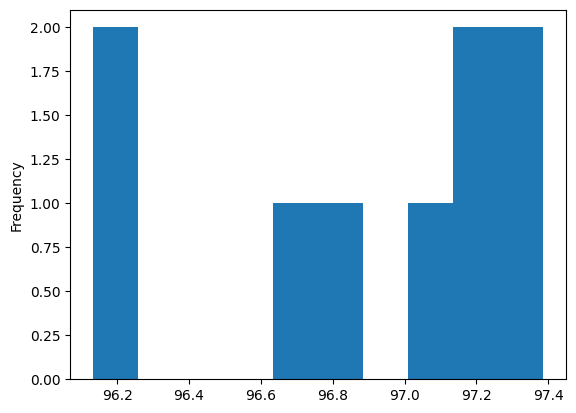

In [ ]:
errorratio.plot.hist()

In [ ]:
SSR=((testing["Performance Index"]-testing["predictions"])**2).sum()

In [ ]:
SST=((testing["Performance Index"]-testing["Performance Index"].mean())**2).sum()

In [ ]:
R2=1-(SSR/SST)

In [ ]:
R2=R2*100;


In [ ]:
R2

98.74967839703092